In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df_loan = pd.read_csv('C:/Users/aksin52/Documents/My Webinars/Credit Risk Datasets and Projects/Lending Data and Project/lending-club-loan-data/loan.csv')
#df_test  = pd.read_excel('C:/Users/aksin52/Documents/Webinar_Customer_Segmentation/test.xlsx')
#df_combined = pd.concat([df_train, df_test])

C:\Anaconda_Python\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#Analyzing target variable - loan_status
df_loan['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [ ]:
loan_filter = df_loan['loan_status'].isin(['Fully Paid','Charged Off','Default'])
df_loan = df_loan[loan_filter]
df_loan['loan_status'].value_counts()


Fully Paid     207723
Charged Off     45248
Default          1219
Name: loan_status, dtype: int64

Python map() function is used to apply a function on all the elements of specified iterable and return map object. 
Python map object is an iterator, so we can iterate over its elements. 
We can also convert map object to sequence objects such as list, tuple etc. using their factory functions.

In [ ]:
def CreateTarget(status): 
    if status == 'Fully Paid':
        return 0
    else:
        return 1
    
df_loan['Late_Loan'] = df_loan['loan_status'].map(CreateTarget)
df_loan['Late_Loan'].value_counts()
df_loan['Late_Loan'].mean()

0.18280420158149416

In [ ]:
#limitPer = len(df_loan) * .01
#df_loan = df_loan.dropna(thresh=limitPer,axis=1)
#len(df_loan)

254190

In [ ]:
#drop features with more than 10% missing values
features_missing_series = df_loan.isnull().sum() > len(df_loan)/10
features_missing_series = features_missing_series[features_missing_series == True]
features_missing_list =  features_missing_series.index.tolist()
df_loan = df_loan.drop(features_missing_list,axis =1)

In [ ]:
#list(df_loan.columns.values)
#Drop those variables that have little impact on the outcome and does not make intuitive sense

In [ ]:
df_loan_1 = df_loan.drop(['id','member_id','loan_status','url','zip_code','policy_code','application_type','last_pymnt_d','last_credit_pull_d','verification_status','pymnt_plan','funded_amnt','funded_amnt_inv','sub_grade','out_prncp','out_prncp_inv','total_pymnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','initial_list_status','earliest_cr_line'],axis =1)
df_loan_1['emp_length'].fillna('Unknown',inplace = True)
df_loan_1['emp_title'].fillna('Unknown',inplace = True)
df_loan_1['title'].fillna('Unknown',inplace = True)
df_loan_1['revol_util'].fillna(df_loan_1['revol_util'].mean(),inplace = True)
df_loan_1['collections_12_mths_ex_med'].fillna(df_loan_1['collections_12_mths_ex_med'].mean(),inplace = True)
df_loan_1.isnull().sum()

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
collections_12_mths_ex_med    0
acc_now_delinq                0
Late_Loan                     0
dtype: int64

In [ ]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
final_iv, IV = data_vars(df_loan_1,df_loan_1.Late_Loan)

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log
C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in log


In [ ]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,loan_amnt,500,6000,49948,7691,0.153980,42257,0.846020,0.165515,0.203430,-0.206256,0.025570
1,loan_amnt,6025,9000,36665,5967,0.162744,30698,0.837256,0.128414,0.147783,-0.140490,0.025570
2,loan_amnt,9025,12000,51177,8940,0.174688,42237,0.825312,0.192395,0.203333,-0.055298,0.025570
3,loan_amnt,12025,15600,31879,5800,0.181938,26079,0.818062,0.124820,0.125547,-0.005809,0.025570
4,loan_amnt,15625,21000,42829,8786,0.205141,34043,0.794859,0.189080,0.163887,0.142998,0.025570
5,loan_amnt,21025,35000,41692,9283,0.222657,32409,0.777343,0.199776,0.156020,0.247212,0.025570
6,term,36 months,36 months,197373,29798,0.150973,167575,0.849027,0.641272,0.806723,-0.229527,0.140297
7,term,60 months,60 months,56817,16669,0.293381,40148,0.706619,0.358728,0.193277,0.618441,0.140297
8,int_rate,5.32,6.92,13458,534,0.039679,12924,0.960321,0.011492,0.062217,-1.688982,0.418546
9,int_rate,6.97,7.9,18213,1197,0.065722,17016,0.934278,0.025760,0.081917,-1.156873,0.418546


In [ ]:
IV.sort_values('IV')

,VAR_NAME,IV
3,collections_12_mths_ex_med,0.000001
0,acc_now_delinq,0.000066
15,pub_rec,0.000132
14,open_acc,0.001109
4,delinq_2yrs,0.001647
17,revol_bal,0.001897
21,total_acc,0.007369
6,emp_length,0.011091
9,inq_last_6mths,0.014768
1,addr_state,0.015219


In [ ]:
IV.to_csv('C:/Users/aksin52/Documents/My Webinars/Credit Risk Datasets and Projects/Lending Data and Project/lending-club-loan-data/test.csv')

In [ ]:
transform_vars_list = df_loan_1.columns.difference(['Late_Loan'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [ ]:
transform_vars_list
df=df_loan_1
df.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,issue_d,purpose,...,new_installment,new_int_rate,new_issue_d,new_loan_amnt,new_open_acc,new_pub_rec,new_purpose,new_revol_bal,new_revol_util,new_term
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Dec-2011,credit_card,...,-0.213685,-0.553829,0.164498,-0.206256,-0.052318,-0.001401,-0.159352,0.042962,0.226704,-0.229527
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Dec-2011,car,...,-0.213685,0.201376,0.164498,-0.206256,-0.052318,-0.001401,-0.445949,-0.044161,-0.617059,0.618441
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Dec-2011,small_business,...,-0.213685,0.361226,0.164498,-0.206256,-0.052318,-0.001401,0.610372,-0.044161,0.373148,-0.229527
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Dec-2011,other,...,-0.013204,-0.070274,0.164498,-0.055298,-0.004336,-0.001401,0.167984,-0.044161,-0.515214,-0.229527
5,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Dec-2011,wedding,...,-0.213685,-1.156873,0.164498,-0.206256,-0.004336,-0.001401,-0.355291,-0.044161,-0.346166,-0.229527


In [ ]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
        except:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))

In [ ]:
df['new_grade'].value_counts()

-0.426553    76263
 0.098368    65680
-1.203530    42343
 0.474960    40818
 0.803542    19387
 1.047320     7739
 1.155391     1960
Name: new_grade, dtype: int64

In [ ]:
df['grade'].value_counts()

B    76263
C    65680
A    42343
D    40818
E    19387
F     7739
G     1960
Name: grade, dtype: int64

In [ ]:
df_loan.groupby('grade').mean()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,Late_Loan
grade,,,,,,,,,,,,,,,,,,,,,
A,9.949897e+06,1.104869e+07,12238.253076,12184.365775,12117.488194,7.509200,376.264132,79659.667478,14.136991,0.108731,...,11685.834531,982.761098,0.317073,32.735367,3.400583,5437.207686,0.001843,1.0,0.000520,0.062915
B,1.044347e+07,1.164481e+07,12403.057839,12365.174134,12269.950280,11.549459,390.475362,71218.260186,16.127525,0.225719,...,11269.439840,1543.239956,0.511859,81.448141,8.071818,5673.539779,0.005259,1.0,0.002098,0.127414
C,1.354338e+07,1.496859e+07,13284.284409,13257.982643,13164.550984,14.627143,409.336144,69774.278930,17.149789,0.289936,...,11230.243554,1961.558645,0.743527,148.351531,16.051018,6657.434556,0.008208,1.0,0.003289,0.197960
D,1.390618e+07,1.535181e+07,14221.946200,14196.990298,14103.592174,17.576956,441.367799,69293.445628,17.732113,0.318340,...,11122.414938,2422.734004,0.998920,232.546682,25.142627,6802.803518,0.009727,1.0,0.004679,0.264540
E,1.614009e+07,1.770801e+07,17640.745087,17563.011296,17446.271711,20.342179,518.900275,74902.232019,18.276621,0.323309,...,12606.067553,3410.818020,1.242715,398.248083,41.636952,8663.785741,0.010318,1.0,0.006551,0.333161
F,1.512346e+07,1.661618e+07,19198.358961,19107.090709,18989.054432,23.430647,567.375251,76796.412433,18.198046,0.353276,...,12598.798374,4225.011198,1.589745,577.512640,57.959489,9060.174707,0.010211,1.0,0.006590,0.389327
G,1.633520e+07,1.790590e+07,21331.288265,21262.946429,21100.901853,25.048969,641.889388,86453.159260,18.181122,0.421429,...,13535.499337,4828.503995,2.360267,654.864071,72.580794,9833.139439,0.013776,1.0,0.013776,0.415306


In [ ]:
y=df['Late_Loan']
y.mean()
features=[#'new_acc_now_delinq',
'new_addr_state',
'new_annual_inc',
#'new_collections_12_mths_ex_med',
'new_delinq_2yrs',
'new_dti',
'new_emp_length',
'new_grade',
'new_home_ownership',
'new_inq_last_6mths',
#'new_installment',
'new_int_rate',
'new_issue_d',
'new_loan_amnt',
'new_open_acc',
#'new_pub_rec',
'new_purpose',
#'new_revol_bal',
'new_revol_util',
'new_term'
]
X=df[features]


In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.622758
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: -0.309     
Dependent Variable: Late_Loan        AIC:              316627.5424
Date:               2019-01-23 20:23 BIC:              316784.2300
No. Observations:   254190           Log-Likelihood:   -1.5830e+05
Df Model:           14               LL-Null:          -1.2090e+05
Df Residuals:       254175           LLR p-value:      1.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
------------------------------------------------------------------
new_addr_state        0.8050   0.0345 23.3307 0.0000 0.7374 0.8727
new_annual_inc        1.1088   0.0217 51.1791 0.0000 

In [ ]:
# Dropping the non signifant varibales and re-running the earlier step


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [ ]:
y_pred = logreg.predict(X)
y_pred_tree=dtree.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [ ]:
#Checking if the Regression Coefficients have the right sign
#df['new_acc_now_delinq_rk']=pd.qcut(df['new_acc_now_delinq'].rank(method='first').values,10,duplicates='drop').codes+1
#df.groupby('new_acc_now_delinq_rk')['new_acc_now_delinq','Late_Loan'].mean()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
#print(confusion_matrix)
pd.crosstab(y,y_pred)

col_0,0,1
Late_Loan,,
0,205971,1752
1,44332,2135


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.82      0.99      0.90    207723
          1       0.55      0.05      0.08     46467

avg / total       0.77      0.82      0.75    254190



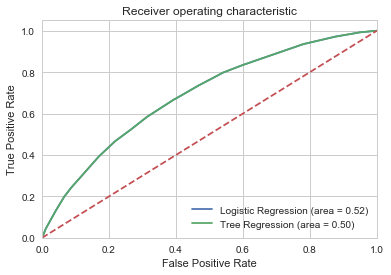

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Tree Regression (area = %0.2f)' % tree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()